In [1]:
import time
from ising import *

rows, cols = 40, 40
k_f = 0.1
J0 = -1.0

##defining the lattice 
lattice = TriangularLattice(k_f, J0)
lattice.generate_lattice(40,40,0.1)


/home/lisa/Desktop/projects/pt2se/test/ising.py:62: RuntimeWarning: invalid value encountered in multiply
  + j1(self.kf * distances) * y1(self.kf * distances)


In [2]:
%%time
##running the simulations
T = 0.1
steps, warmup = 1_000_000, 10_000
lattice.monte_carlo_loop(steps,warmup, T)


100%|██████████| 1000000/1000000 [00:34<00:00, 28710.00it/s]


CPU times: user 35 s, sys: 103 ms, total: 35.1 s
Wall time: 35 s


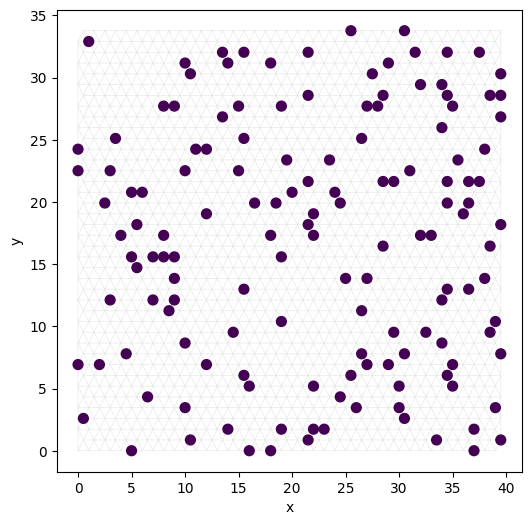

In [3]:
lattice.plot_lattice()

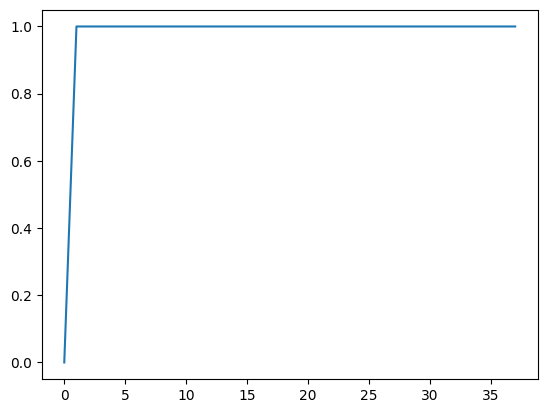

In [4]:
plt.plot(lattice.pair_correlation)

In [5]:
# lattice.plot_ft_pair_correlation()


ValueError: x and y must have same first dimension, but have shapes (25,) and (151,)

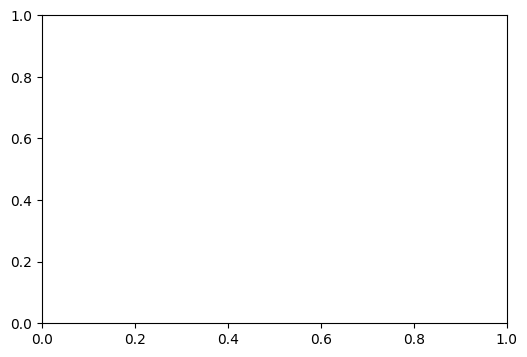

In [6]:
lattice.plot_ft_pair_correlation()
